# CS-433 Machine learning project 1

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import helpers
from implementations import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# x_train = np.genfromtxt("data/dataset/x_train.csv", delimiter=',', skip_header=1)
# y_train = np.genfromtxt("data/dataset/y_train.csv", delimiter=',', skip_header=1)
# x_test =  np.genfromtxt("data/dataset/x_test.csv", delimiter=',', skip_header=1)
x_train, x_test, y_train, train_ids, test_ids = helpers.load_csv_data("data/dataset")
x_train_orig = x_train.copy()
y_train_orig = y_train.copy()

In [38]:
print(x_train[:,5])
print(x_train[0,5].dtype)
print(np.isnan(x_train[0,5]))
print(np.sum(np.isnan(x_train[:,10])))
print(y_train)

[2015. 2015. 2015. ... 2015. 2015. 2015.]
float64
False
139415
[-1 -1 -1 ... -1 -1 -1]


## Nan handling

In [39]:

#calculate number number of nan per column
logical_matrix = np.isnan(x_train)
nan_per_columns = np.sum(logical_matrix, axis=0)
print(nan_per_columns)
average_nan = np.mean(nan_per_columns)
print(average_nan)
print(np.shape(nan_per_columns))
print(np.shape(x_train)[1])

[     0      0      0      0      0      0      0      0      0 139415
 139415 328103 139416 139415 328103 139433 139524 139525 188720 188720
 188721 188720 327334 188719 189287 192544      2      1      0 159860
      0      0      1      1      1 196334      0  43801  43801      0
      0 284153      1      0      0      1      0      0      5 285915
      0      0      0      0 139415 318245 139415      1      0      3
   2471   3207   3946   4407 279663   6933   7743   8293   8728   9149
   9432   9862  10541 191379 282510 237369  11007  11765 170906 171212
 171522  20738  21567  22468  23149  23759  24502  26205 107829 109141
 109407 109690 181261 181400  28647 226907 227043 227197 229088  29911
  30600 186763 186001  31022  32080 243418 243561 266689 266689 306425
 306426 306428 306429 306429 306629 306429 306430 306430 247299 310302
 310320 310346 310367 310392 310403 310450 265347 325762 325769 325769
 327339 326264 325775 325777 325777 325780 241493 318477 318489 325051
 31850

In [40]:
# delet the columns with more nan than the average
x_train_reduced_features = x_train[:, nan_per_columns <= average_nan]




In [41]:
print(np.shape(x_train))

(328135, 321)


In [42]:
#replace nan values with 0:
x_train_w_mean = x_train
for i in range( np.shape(x_train)[1]):
    nan_entries = np.isnan(x_train[:,i])
    mean = np.mean(x_train[~nan_entries,i])

    nan_entries = np.isnan(x_train[:,i])

    x_train_w_mean[nan_entries, i] = 0
    
logical_matrix = np.isnan(x_train_w_mean)
nan_per_columns2 = np.sum(logical_matrix, axis=0)
print(nan_per_columns2)





[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [43]:
x_train_std, _, _, = standardize(x_train_w_mean)
print(x_train_std)

[[ 1.4362964   1.33036073  1.31787257 ... -0.43830768 -0.42493604
   0.1522069 ]
 [ 0.18877218  1.61711904  1.60160179 ... -0.43830768 -0.42493604
  -1.19716795]
 [-0.62211856  1.04360241  1.04274121 ...  0.09962797  0.56745845
   0.1522069 ]
 ...
 [ 0.56302944  1.04360241  1.04274121 ...  0.63756363  0.56745845
   0.1522069 ]
 [ 0.18877218  1.61711904  1.64459107 ... -0.43830768 -0.42493604
   0.1522069 ]
 [ 0.12639597  0.7568441   0.73321843 ... -0.43830768 -0.42493604
   0.1522069 ]]


In [44]:


print(np.shape(x_train_std))



(328135, 321)


In [45]:
### Count the amount of incidents

minus_ones = np.sum((y_train == -1))

ones = np.sum(( y_train == 1))
print(f"There are {100*minus_ones/len(y_train):.2f} % -1.\n")
print(f"There are {100*ones/len(y_train):.2f} % 1.\n")

There are 91.17 % -1.

There are 8.83 % 1.



## Using a Chi-squared test to determine the important values


In [46]:
# Define a function to calculate the chi-squared values for all features
def chi2_features(X, y):
    chi2_scores = []
    for feature in range(X.shape[1]):
        # Create a contingency table
        contingency_table = np.zeros((2, 2))
        for i in range(2):
            for j in range(2):
                # Count occurrences for each combination of feature and target
                contingency_table[i, j] = np.sum((X[:, feature] == i) & (y == j))
        # Calculate the chi-squared statistic
        chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))
        chi2_scores.append(chi2)
    return chi2_scores

# Calculate chi-squared values for all features
chi2_scores = chi2_features(x_train_std, y_train)

# Specify the number of top features to select (k)
k = 20

# Get the indices of the top k features with the highest chi-squared scores
selected_feature_indices = np.argsort(chi2_scores)[-k:]

print(selected_feature_indices)

/tmp/ipykernel_4836/2622695774.py:12: RuntimeWarning: invalid value encountered in divide
  chi2 = np.sum((contingency_table - np.mean(contingency_table))**2 / np.mean(contingency_table))


[100 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101
 159 320]


## Rebalancing the data

In [47]:
# Choose the desired number of instances for each class
desired_majority_class = 0.20  # for -1
desired_minority_class = 1  # for 1

# Find the indices of the majority and minority classes
majority_indices = np.where(y_train == -1)[0]
minority_indices = np.where(y_train == 1)[0]

# Calculate the number of samples to keep for each class
num_samples_majority = int(desired_majority_class * len(majority_indices))
num_samples_minority = int(desired_minority_class * len(minority_indices))

# Randomly select a subset of majority class instances (undersampling)
undersampled_majority_indices = np.random.choice(majority_indices, num_samples_majority, replace=False)

# Randomly select a subset of minority class instances (oversampling)
oversampled_minority_indices = np.random.choice(minority_indices, num_samples_minority, replace=True)

# Combine the undersampled majority class with the oversampled minority class
X_balanced = np.vstack((x_train_std[undersampled_majority_indices], x_train_std[oversampled_minority_indices]))
y_balanced = np.hstack((y_train[undersampled_majority_indices], y_train[oversampled_minority_indices]))

# Calculate the proportion of each class in the rebalanced dataset
proportion_majority_class = np.sum(y_balanced == -1) / len(y_balanced)
proportion_minority_class = np.sum(y_balanced == 1) / len(y_balanced)

print("Proportion of majority class (-1) in rebalanced dataset:", proportion_majority_class)
print("Proportion of minority class (1) in rebalanced dataset:", proportion_minority_class)


Proportion of majority class (-1) in rebalanced dataset: 0.6737306743837761
Proportion of minority class (1) in rebalanced dataset: 0.32626932561622396


## Training the model

In [48]:
best_feature_indices = [16, 22, 28, 41, 52, 71, 234, 236]

#tx = x_train_std[:, selected_feature_indices] # change input data here
#tx = x_train_std[:, 10:321] # change input data here
tx = X_balanced[:, selected_feature_indices] # change input data here

#y = y_train[:] # change target value here
y = y_balanced[:] # change target value here
y = y.reshape(-1,)



w_s=[]
losses=[]

# Number of features
num_features = tx.shape[1]

""" # Initialize weights randomly
w = np.random.uniform(-1, 1, (num_features,)) """

# Initialize weights using Xavier/Glorot initialization
w = np.random.uniform(-np.sqrt(6.0 / (num_features + 1)), np.sqrt(6.0 / (num_features + 1)), (num_features,))

""" # Initialize weights to near zero
w = np.full((num_features ,), 1e-16)  """

max_iters=100
accs=[]
precs=[]
recs=[]
F1s=[]
batch_size = 1
lambda_ = 1e-3
gamma = 0.001

for i in range(max_iters):

    #1) mean_squared_error_gd
    #w, loss = mean_squared_error_gd(y, tx, w, max_iters, gamma)

    #2) mean_squared_error_sgd
    #w, loss = mean_squared_error_sgd(y, tx, w, max_iters, gamma,  batch_size, num_batches=1) 

    #3) least_squares
    #w, loss = least_squares(y, tx)  # change input data here, matrix is not invertible[10, 12, 14/15/20/69]

    #4) ridge_regression
    #w, loss = ridge_regression(y, tx, lambda_)

    #5) logistic_regression
    #w, loss = logistic_regression_minusone_one(y, tx, w, max_iters, gamma)

    #6) reg_logistic_regression
    w, loss = reg_logistic_regression(y, tx, lambda_, w, max_iters, gamma) 

    #7) logistic_regression with mini-batch
    #w, loss = logistic_regression_with_mb(y, tx, w, max_iters, gamma, batch_size)
 
    losses.append(loss)

 
    y_1 = tx.dot(w)
    y_2 = compute_sigmoid(y_1)
    y_pred = y_2.copy()
    y_pred[y_2>0.5] = 1
    y_pred[y_2<=0.5] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)


    if acc > 0.75 :
        w_s.append(w)

    accs.append(acc)
    precs.append(prec)
    recs.append(recs)
    F1s.append(F1score)
    conf_matrix = np.array([[TP, FP], [FN, TN]])
    print(f"Iteration {i} of {max_iters} finished.")
    print(f"Accuracy : {acc}, Loss : {loss}, F1score : {F1score}")
        
w_s = np.asarray(w_s)
print("lambda = ",lambda_,"| Accuracy moyenne :",np.mean(accs),"| Acc>0.75 :",w_s.shape[0])



Iteration 0 of 100 finished.
Accuracy : 0.5358361390430935, Loss : 0.8235257538967186, F1score : 0.3557507462919838
Iteration 1 of 100 finished.
Accuracy : 0.5383246816129359, Loss : 0.8137600615136921, F1score : 0.35973514897869946
Iteration 2 of 100 finished.
Accuracy : 0.5399349150404811, Loss : 0.8048912458294478, F1score : 0.36205792801936143
Iteration 3 of 100 finished.
Accuracy : 0.5417140540723141, Loss : 0.7967975680450873, F1score : 0.36462415112013113
Iteration 4 of 100 finished.
Accuracy : 0.5427500084452802, Loss : 0.7893785280319032, F1score : 0.36657463303539395
Iteration 5 of 100 finished.
Accuracy : 0.5436395779611968, Loss : 0.7825511014305971, F1score : 0.3688210559102943
Iteration 6 of 100 finished.
Accuracy : 0.5442926796311102, Loss : 0.776246445199165, F1score : 0.37013633816846164
Iteration 7 of 100 finished.
Accuracy : 0.5447656153231164, Loss : 0.7704071424910617, F1score : 0.3715333913692327
Iteration 8 of 100 finished.
Accuracy : 0.5586834371164435, Loss : 0

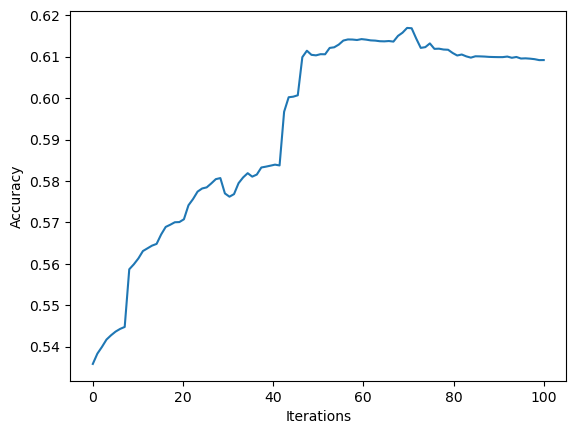

In [49]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), accs)
#plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

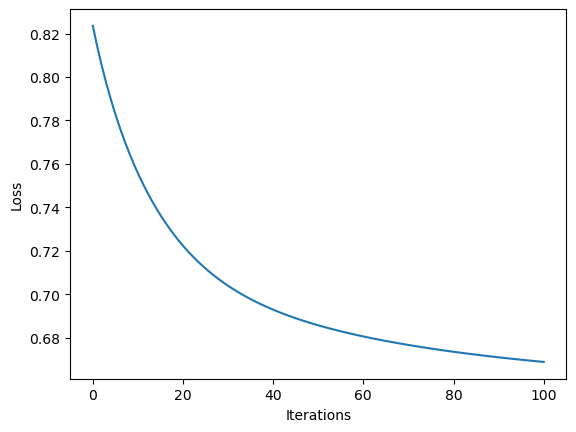

In [50]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

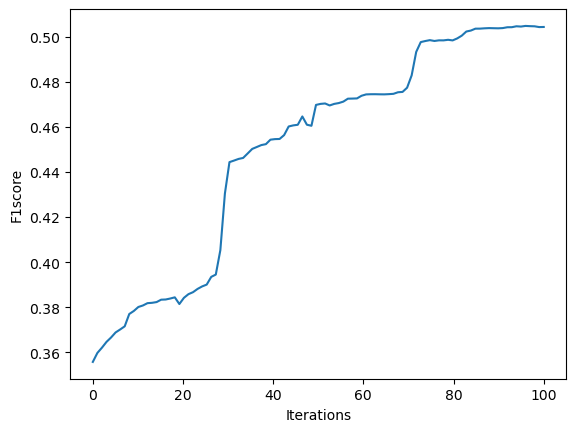

In [51]:
plt.figure()
plt.plot(np.linspace(0, max_iters, max_iters), F1s)
plt.xlabel("Iterations")
plt.ylabel("F1score")
plt.show()

In [52]:
def baseline_prediction(y):
    """ 
    Baseline prediction for logistic regression
    Args:
    y: input data
    """
    y_pred = np.random.choice([-1,1], size=len(y))
    return y_pred

""" y_baseline = baseline_prediction(y_test)
print(np.shape(y_baseline)) """

' y_baseline = baseline_prediction(y_test)\nprint(np.shape(y_baseline)) '

In [53]:
#Create baseline prediction file
helpers.create_csv_submission(test_ids, y_baseline, "baseline")

NameError: name 'y_baseline' is not defined

## Create an AI-Crowd submission

In [ ]:
### Generate first submission
x_test = handle_nan_values(x_test, delete_nan_columns=False)
x_test, _, _  = standardize(x_test)
y_test = predict_y(w, x_test[:, best_feature_indices])

helpers.create_csv_submission(test_ids, y_test, "AI_crowd_submission3")


## Evaluating all methods with different gamma

In [ ]:
def calculate_acc_and_fone(y, tx, w):
    y_1 = tx.dot(w)
    y_2 = compute_sigmoid(y_1)
    y_pred = y_2.copy()
    y_pred[y_2>0.5] = 1
    y_pred[y_2<=0.5] = -1
    
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    for pred in range(len(y_pred)):
        if (y_pred[pred] == 1 and y[pred] == 1):
            TP+=1
        elif (y_pred[pred] == 1 and y[pred] == -1):
            FP+=1
        elif (y_pred[pred] == -1 and y[pred] == 1):
            FN+=1
        else :
            TN+=1
    acc = (TP+TN)/len(y_pred)
    if TP + FP == 0:
        prec = 0  # Avoid division by zero
    else:
        prec = TP / (TP + FP)


    if TP + FN == 0:
        rec = 0  # Avoid division by zero
    else:
        rec = TP / (TP + FN)


    if prec + rec == 0:
        F1score = 0  # Avoid division by zero
    else:
        F1score = 2 * prec * rec / (prec + rec)

    return acc, F1score



In [77]:

N, D = tx.shape

# divide dataset into train and test data in order to test prediction on other data than was used for testing
train_data_size = int(N/2)
local_test_data_size = N - train_data_size

x_local = tx[:train_data_size, :]
y_local = y[:train_data_size]
x_local_test = tx[train_data_size:, :]
y_local_test = y[train_data_size:]

initial_w = np.random.uniform(-np.sqrt(6.0 / (num_features + 1)), np.sqrt(6.0 / (num_features + 1)), (num_features,))

max_iters=100
batch_size = 1

gammas = np.array([0.1, 0.01, 0.001, 0.0001])

# Evaluate mean_squarred_error_gd
acc_mse_gd = []
f1_mse_gd = []
for gamma in gammas:
    w, loss = mean_squared_error_gd(y_local, x_local, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_mse_gd.append(acc)
    f1_mse_gd.append(f1)

# Evaluate mean_squared_error_sgd
acc_mse_sgd = []
f1_mse_sgd = []
for gamma in gammas:
    w, loss = mean_squared_error_sgd(y_local, x_local, initial_w, max_iters, gamma, batch_size=128, num_batches=16)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_mse_sgd.append(acc)
    f1_mse_sgd.append(f1)

# Evaluate least_squares
acc_least_squares = []
f1_least_squares = []
w, loss = least_squares(y_local, x_local)
acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
acc_least_squares.append(acc)
f1_least_squares.append(f1)


# Evaluate ridge_regression
acc_ridge = []
f1_ridge = []
w, loss = ridge_regression(y_local, x_local, lambda_)
acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
acc_ridge.append(acc)
f1_ridge.append(f1)

# Evaluate logistic_regression
acc_log_reg = []
f1_log_reg = []
for gamma in gammas:
    w, loss = logistic_regression(y_local, x_local, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_log_reg.append(acc)
    f1_log_reg.append(f1)

# Evaluate reg_logistic_regression
acc_reg_log_reg = []
f1_reg_log_reg = []
for gamma in gammas:
    w, loss = reg_logistic_regression(y_local, x_local, lambda_, initial_w, max_iters, gamma)
    acc, f1 = calculate_acc_and_fone(y_local_test, x_local_test, w)
    acc_reg_log_reg.append(acc)
    f1_reg_log_reg.append(f1)

print(gammas)


[0.1    0.01   0.001  0.0001]


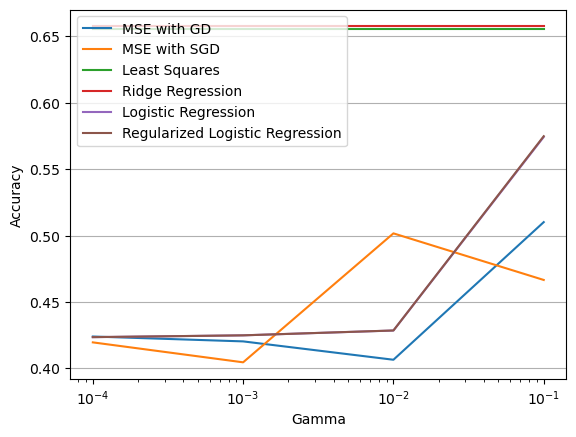

In [85]:
# Plot Accuracies
plt.figure()

plt.xscale('log')

plt.plot(gammas, acc_mse_gd, label="MSE with GD")
plt.plot(gammas, acc_mse_sgd, label="MSE with SGD")
plt.plot(gammas, 4* acc_least_squares, label="Least Squares")
plt.plot(gammas, 4* acc_ridge, label="Ridge Regression")
plt.plot(gammas, acc_log_reg, label="Logistic Regression")
plt.plot(gammas, acc_reg_log_reg, label="Regularized Logistic Regression")

plt.legend(loc="upper left")

plt.xlabel("Gamma")
plt.ylabel("Accuracy")

plt.grid(axis = 'y')

plt.show()

In [ ]:
# Plot F1
plt.figure()

plt.xscale('log')

plt.plot(gammas, acc_mse_gd, label="MSE with GD")
plt.plot(gammas, acc_mse_sgd, label="MSE with SGD")
plt.plot(gammas, 4* acc_least_squares, label="Least Squares")
plt.plot(gammas, 4* acc_ridge, label="Ridge Regression")
plt.plot(gammas, acc_log_reg, label="Logistic Regression")
plt.plot(gammas, acc_reg_log_reg, label="Regularized Logistic Regression")

plt.legend(loc="upper left")

plt.xlabel("Gamma")
plt.ylabel("Accuracy")

plt.grid(axis = 'y')

plt.show()

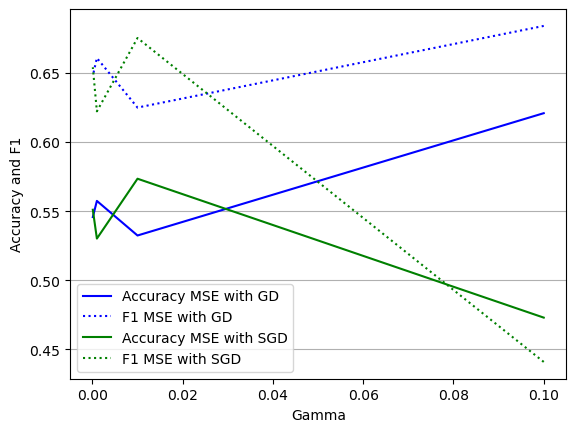

In [ ]:
plt.figure()
plt.plot(gammas, acc_mse_gd, label="Accuracy MSE with GD", color="b")
plt.plot(gammas, f1_mse_gd, label="F1 MSE with GD", linestyle = 'dotted', color="b")
plt.plot(gammas, acc_mse_sgd, label="Accuracy MSE with SGD", color="g")
plt.plot(gammas, f1_mse_sgd, label="F1 MSE with SGD", linestyle = 'dotted', color="g")

plt.legend()

plt.xlabel("Gamma")
plt.ylabel("Accuracy and F1")

plt.grid(axis = 'y')

plt.show()

## Plotting features for linear separation

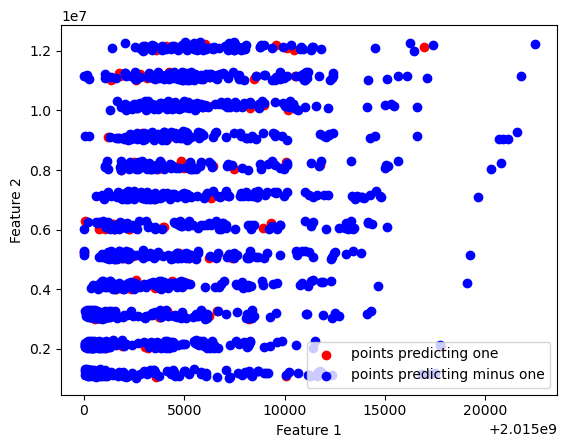

In [ ]:
# [100 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103 102 101 159 320]
feature1 = 116
feature1 = 8
feature2 = 2

num_samples = 1500

ones = y_train==1
minus_ones = y_train==-1

ones = ones[:num_samples]
minus_ones = minus_ones[:num_samples]

x_points_one = x_train_orig[:num_samples, feature1][ones]
x_points_minus_one = x_train_orig[:num_samples, feature1][minus_ones]

y_points_one = x_train_orig[:num_samples, feature2][ones]
y_points_minus_one = x_train_orig[:num_samples, feature2][minus_ones]

plt.figure()

plt.scatter(x_points_one, y_points_one, color="r", label="points predicting one")
plt.scatter(x_points_minus_one, y_points_minus_one, color="b", label="points predicting minus one")

plt.legend()

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.show()
